# 혈압-혈당 데이터 분석

> "작성 중"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [python, visualization]

# 패키지 import 및 데이터 요약

`-` 데이터 출처 : https://nhiss.nhis.or.kr/bd/ab/bdabf003cv.do

`-` 한글 깨짐 참고 : https://mirae-kim.tistory.com/14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib
# from scipy import stats
# import plotly.express as px 
# from plotnine import *
# import plotly.figure_factory as ff

fig_dims = (8, 4)  # 그래프의 출력 사이즈를 나타냄 # 너무 커... # 나중에 레포트제출할 땐 사이즈를 키우자
sns.set(rc = {'figure.figsize':fig_dims}) # plot 사이즈 및 스타일 통일
sns.set_theme() # 테마 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글이 깨재지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False    # 한글이 깨재지 않도록 설정

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gkswotn9999/data/main/blood_data.csv', header = 0) ## 2013~2014년에 실시된 백만개의 국가건강검진_혈압혈당데이터

In [3]:
df.shape ## matrix는 1000000 × 7 크기

(1000000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   DIS     1000000 non-null  int64  
 6   BMI     1000000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 53.4 MB


`-` 결측치는 없다

`-` 우선 열 이름을 변경해주자

In [3]:
df.columns = ['성별', '연령대', '수축기혈압', '이완기혈압', '공복혈당', '고혈압_당뇨', 'BMI']

In [34]:
df.head(6)

,성별,연령대,수축기혈압,이완기혈압,공복혈당,고혈압_당뇨,BMI
0,1,20대초반,116,78,94,4,16.6
1,1,20대초반,100,60,79,4,22.3
2,1,20대초반,100,60,87,4,21.9
3,1,20대초반,111,70,72,4,20.2
4,1,20대초반,120,80,98,4,20.0
5,1,20대초반,115,79,95,4,23.1


`-` 변수별 요약통계량은 아래와 같다

In [148]:
df.describe().round(2)

,성별,수축기혈압,이완기혈압,공복혈당,고혈압_당뇨,BMI
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.0
mean,1.49,121.87,75.79,98.86,3.47,23.8
std,0.50,14.56,9.79,22.98,0.95,3.3
min,1.00,82.00,50.00,60.00,1.00,14.8
25%,1.00,110.00,70.00,87.00,3.00,21.5
50%,1.00,120.00,76.00,94.00,4.00,23.6
75%,2.00,130.00,80.00,104.00,4.00,25.8
max,2.00,190.00,120.00,358.00,4.00,40.3


`-` 각 변수에 대한 설명은 아래와 같다

|변수명 | 범위|비고|
|:-:|:-:|:-:|
|수축기혈압| 82-190 mmHg|상·하위 극단값 0.05% 제거|
|이완기혈압| 50-120 mmHg|〃(위와 동일함)|
|공복혈당| 60-358 mg/dL|〃|  
|BMI| 14.8-40.3 kg/m2|〃|

|성별 | 숫자|
|:-:|:-:|
|남자 | 1|
|여자| 2|

|고혈압/당뇨병 진료여부 | 숫자|
|:-:|:-:|
|고혈압/당뇨병 진료내역 있음| 1|
|고혈압 진료내역 있음| 2|
|당뇨병 진료내역 있음| 3|
|고혈압/당뇨병 진료내역 없음| 4|

`-` 현재 연령대 column 이 가지는 값은 1부터 27 까지인데 이들에는 1 => 20~24, 2 부터는 24살부터 2세 간격으로 끊어진 연령대가 할당되고 마지막은 27 => 75+ 이다

`-` 변수가 가지는 범주가 너무 많고 범주가 가지는 나이의 범위가 현재 2세인데 조금 더 늘려도 크게 차이가 있을 것 같지는 않다

`-` 표본수가 많으므로 10세 간격으로 끊지 않고 5세 간격으로 끊어 비슷한 연령끼리 그룹화 하자

`-` 애매한 것은 연령대 데이터가 31-32, 33-34, 35-36, 37-38, 39-40 이런식으로 되어있어 5개씩 나눌 수 가 없는 점이다

`-` 1\~5 과 6\~10으로 나누면 균등해지고 좋을 것 같다

`-` 혈압혈당데이터는 건강검진을 받은 사람들 중 백만명을 무작위로 샘플링했다

`-` 그렇기에 주기성이 없을 것이니 하나의 난수를 가지고 20~60세의 초반, 후반을 나누자

`-` 5세 간격으로 끊어 편의상 1\~5는 '초반', 6\~10은 '후반'으로 표기했다

`-` 위의 범주를 무작위로 50%씩 나눠서 반절은 '초반'에 나머지 반절은 '후반'에 할당하자

In [4]:
np.random.seed(2021)
rs = np.random.binomial(n = 1, p = 0.5, size = 60000) ## 연령대 범주가 가지는 최대 크기는 대략 53000이므로 60000개를 뽑았다

In [5]:
## 데이터 전처리
c = 2
age = 2
cnt = 3

df.loc[df['연령대'] == 1, '연령대'] = '20대초반' 

for idx in [2, 7, 12, 17, 22]:  # 변수에 대한 설명을 보면 5~6에 해당하는 범주의 값은 2, 7, 12, 17, 22이다                   
    df_ = df.loc[df['연령대'] == idx, '연령대']
    df.loc[df['연령대'] == idx, '연령대'] = rs[: len(df_)]
    df.loc[df['연령대'] == 0, '연령대'] = str(c) + '0대초반'
    df.loc[df['연령대'] == 1, '연령대'] = str(c) + '0대후반'
    c += 1
    
    
for i in range(2, 27):  
    if cnt < 3:
        str_ = '초반'
        
    else:
        str_ = '후반'
        
    df.loc[df['연령대'] == i, '연령대'] = str(age) + '0대' + str_
    
    if cnt == 5:
        age += 1
        cnt = 0
        
    cnt += 1
    
df.loc[df['연령대'] == 27, '연령대'] = '75세이상' 

`-` 연령대의 도수분포표를 그려보자

In [11]:
ft = df['연령대'].value_counts() 
rft = df['연령대'].value_counts() / len(df['연령대']) 

In [12]:
age_group_table = pd.DataFrame({'Freq': ft, 'Relative freq': rft})
age_group_table

,Freq,Relative freq
50대초반,129559,0.129559
40대초반,126398,0.126398
40대후반,117490,0.117490
50대후반,106157,0.106157
30대후반,98717,0.098717
30대초반,83615,0.083615
60대초반,80773,0.080773
20대후반,68741,0.068741
60대후반,61776,0.061776
75세이상,45905,0.045905


`-` 20대 초반 ---> 75세 이상 순서이면 좋겠다

In [13]:
age_group_table.sort_index()

,Freq,Relative freq
20대초반,37876,0.037876
20대후반,68741,0.068741
30대초반,83615,0.083615
30대후반,98717,0.098717
40대초반,126398,0.126398
40대후반,117490,0.117490
50대초반,129559,0.129559
50대후반,106157,0.106157
60대초반,80773,0.080773
60대후반,61776,0.061776


# 데이터 EDA 

`-` 고혈압_당뇨 진료내역에 따른 특성들을 확인할 것이다

## 범주형변수 탐색

In [15]:
ft = df['고혈압_당뇨'].value_counts() 
rft = df['고혈압_당뇨'].value_counts() / len(df['고혈압_당뇨']) 

In [16]:
DIS_table = pd.DataFrame({'Freq': ft, 'Relative freq': rft})
DIS_table

,Freq,Relative freq
4,740662,0.740662
2,162826,0.162826
1,53398,0.053398
3,43114,0.043114


In [50]:
count_by_cut = df.groupby('고혈압_당뇨').size()
count_by_cut

고혈압_당뇨
1     53398
2    162826
3     43114
4    740662
dtype: int64

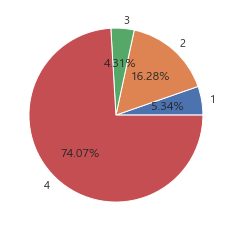

In [52]:
plt.pie(x = count_by_cut, labels = count_by_cut.index, autopct = '%.2f%%') #  autopct 매개변수로 퍼센테이지 표시가 가능하다.
plt.show()

`-` 고혈압/당뇨 둘 다 진료내역 없음이 74%로 가장 많이 차지함

`-` 당뇨 진료내역만 있는 경우는 4%, 고혈압 진료내역만 있는 경우는 16%, 둘다 있는 경우는 5%이다

`-` 둘 다 진료내역이 있는 경우가 당뇨 진료내역만 있는 경우보다 많은 것으로 보아 당뇨가 있는 경우 고혈압도 있는 경우가 빈번한 것 같다

`-` 고혈압/당뇨 진료내역에 따른 사람들의 연령대와 성별을 확인해보자

`-` 우선 고혈압/당뇨 진료내역에 따른 연령대를 확인하자

In [7]:
# 만약 연령대 순서가 맞지 않는다면 아래를 실행하면 된다
# df['연령대'] = pd.Categorical(df['연령대'], ['20대초반', '20대후반', '30대초반', '30대후반', '40대초반', '40대후반', '50대초반', '50대후반', '60대초반', '60대후반', '70대초반', '75세이상'])

In [32]:
DIS_AGE_table = df.groupby(['연령대', '고혈압_당뇨']).size().reset_index(name = 'cnt').pivot(index = '고혈압_당뇨', columns = '연령대', values = 'cnt')
# DIS_AGE_table = pd.crosstab(df['고혈압_당뇨'], df['연령대'], margins = True)

In [36]:
DIS_AGE_table

연령대,20대초반,20대후반,30대초반,30대후반,40대초반,40대후반,50대초반,50대후반,60대초반,60대후반,70대초반,75세이상
고혈압_당뇨,,,,,,,,,,,,
1,13,43,172,561,1651,3038,6062,8069,9257,8938,7502,8092
2,126,427,1382,3651,8758,14138,23864,26002,24855,22045,17007,20571
3,111,300,634,1551,3197,4554,7021,7325,6536,5196,3525,3164
4,37626,67971,81427,92954,112792,95760,92612,64761,40125,25597,14959,14078


`-` 공통적으로 확인되는것은 4번의 경우가 가장 많은 것과 2번의 경우가 3번의 경우보다 더 많다는 것이다

`-` 당뇨병보다는 고혈압이 흔한것 같다

`-` 그리고 젊은 연령대에서는 1번의 경우가 2, 3번인 경우보다 더 적은데 50대 초반부터는 늙을수록 1번의 경우가 3번의 경우보다 더 많아진다

`-` 50대 부터는 당뇨가 있는 경우 고혈압도 있는 경우가 흔한것같고 이는 연령대가 높아질수록 더 심해진다 

`-` 그런데 연령마다 총인원수가 다르기에 사람수로 판단하기 보다는 비율로 판단하는게 좋아보인다

In [41]:
DIS_AGE_table_prob = DIS_AGE_table.apply(lambda x: x*100 / sum(x), axis = 0) # 상대도수를 구함
DIS_AGE_table_prob

연령대,20대초반,20대후반,30대초반,30대후반,40대초반,40대후반,50대초반,50대후반,60대초반,60대후반,70대초반,75세이상
고혈압_당뇨,,,,,,,,,,,,
1,0.034323,0.062554,0.205705,0.568291,1.306192,2.585752,4.678949,7.601006,11.460513,14.468402,17.449352,17.627709
2,0.332664,0.621172,1.652813,3.698451,6.928907,12.033365,18.419407,24.493910,30.771421,35.685379,39.557602,44.812112
3,0.293062,0.436421,0.758237,1.571158,2.529312,3.876075,5.419153,6.900157,8.091813,8.411033,8.199009,6.892495
4,99.339951,98.879853,97.383245,94.162100,89.235589,81.504809,71.482491,61.004927,49.676253,41.435185,34.794036,30.667683


`-` 일단 4인 경우를 확인해보자

`-` 20대초반의 99%는 4번인데 나이가 들어감에 따라 비율이 감소하여 75세이상에서는 4번의 경우가 30%이다

`-` 1과 2의 경우는 4의 경우와 반대로 나이가 들어가면서 비율이 높아진다

`-` 3의 경우는 60대후반까지는 증가하다가 그 이후부터 줄어든다

`-` 요약하면 나이를 먹을수록 4는 증가하고 1,2,3은 감소한다

`-` 고혈압_당뇨 범주마다 연령대의 비율은 어느정도인지 시각화해보자

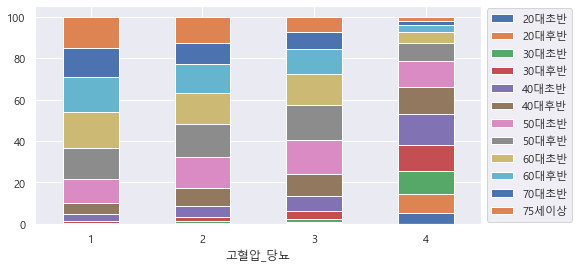

In [46]:
DIS_AGE_table_prob2 = DIS_AGE_table.apply(lambda x: x*100 / sum(x), axis = 1) # 상대도수를 구함
DIS_AGE_table_prob2.plot.bar(stacked = True, rot = 0)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

`-` 막대그래프의 밑에서부터 20대초반, 20대후반, $\cdots$, 70대 초반, 75세이상이다

`-` 고혈압_당뇨가 1, 2, 3인 경우는 비슷해보인다

`-` 고혈압/당뇨 둘 다 진료내역이 없는 경우(4)에는 확실히 다르다

`-` 고혈압/당뇨가 1, 2, 3인 경우 30대 후반까지 차지하는 비중이 낮다

`-` 하지만 4인 경우에는 30대 후반까지 차지하는 비중이 높아졌다

`-` 이제 고혈압/당뇨 진료내역에 따른 성별을 확인하자

In [42]:
DIS_SEX_table = df.groupby(['성별', '고혈압_당뇨']).size().reset_index(name = 'cnt').pivot(index = '고혈압_당뇨', columns = '성별', values = 'cnt')

In [43]:
DIS_SEX_table

성별,1,2
고혈압_당뇨,,
1,27979,25419
2,79892,82934
3,23900,19214
4,378456,362206


In [44]:
DIS_SEX_table_prob = DIS_SEX_table.apply(lambda x: x*100 / sum(x), axis = 1) # 상대도수를 구함
DIS_SEX_table_prob

성별,1,2
고혈압_당뇨,,
1,52.397094,47.602906
2,49.065874,50.934126
3,55.434430,44.565570
4,51.096992,48.903008


<AxesSubplot:xlabel='고혈압_당뇨'>

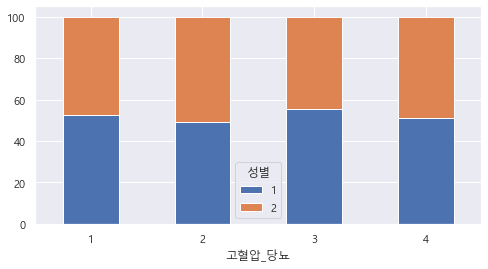

In [56]:
DIS_SEX_table_prob.plot.bar(stacked = True, rot = 0)

`-` 당뇨진료내역이 있는 경우 남자의 비율이 여자보다 살짝 높고 나머지는 비슷하다

`-` 성별과 고혈압/당뇨 진료내역은 연관이 없어보인다

## 양적변수 탐색

### 개별 변수의 시각화

`-` 양적 변수인 수축기혈압, 이완기혈압, 공복혈당, BMI의 분포를 확인해보자

<AxesSubplot:xlabel='수축기혈압', ylabel='Count'>

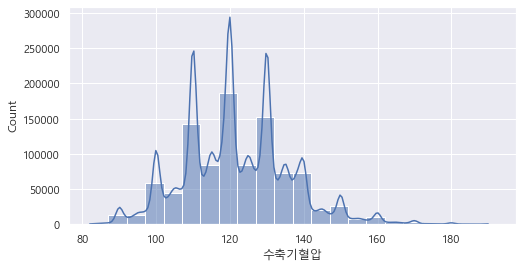

In [19]:
sns.histplot(data = df, x = '수축기혈압', binwidth = 5, kde = True) ## 구간을 5씩 끊어서 관찰

`-` 불편한점 ---> 행이 백만개라 로딩하는데 조금 오래걸림

`-` 분포의 모양을 보면 되게 신기하게 생겼다

`-` 크게 눈에 띄는 봉우리가 4개 존재한다

`-` 즉 몇 군데(봉우리)에 데이터가 많이 몰려있다는 의미이다

<AxesSubplot:xlabel='수축기혈압'>

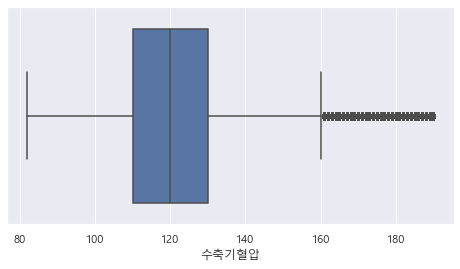

In [7]:
sns.boxplot(x = df['수축기혈압'])

`-` boxplot을 보니 수축기혈압의 이상점은 160을 넘는 경우인 듯 하다

`-` 분포의 모양을 자세히 확인해보자

<AxesSubplot:xlabel='수축기혈압'>

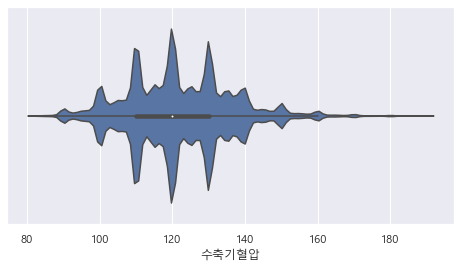

In [8]:
sns.violinplot(x = df['수축기혈압'])

`-` 음 지금으로썬 왜 분포의 모양이 저런지 모르겠다

`-` 근데 사실 궁금한건 고혈압/당뇨인 사람들은 어떤 특성을 가진 사람들인가이다

`-` 고혈압/당뇨에 따라 plot을 그려보자

<AxesSubplot:xlabel='수축기혈압', ylabel='Count'>

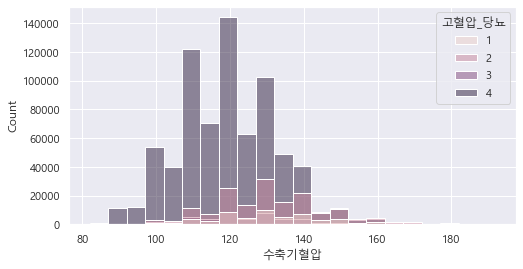

In [25]:
sns.histplot(x = '수축기혈압', binwidth = 5, hue = '고혈압_당뇨', data = df)

`-` 고혈압/당뇨 둘 다 진료내역이 없는 경우의 표본수가 많아 나머지는 잘 보이지 않는다

`-` 고혈압/당뇨 진료내역에 따라 각각 히스토그램을 그려보자

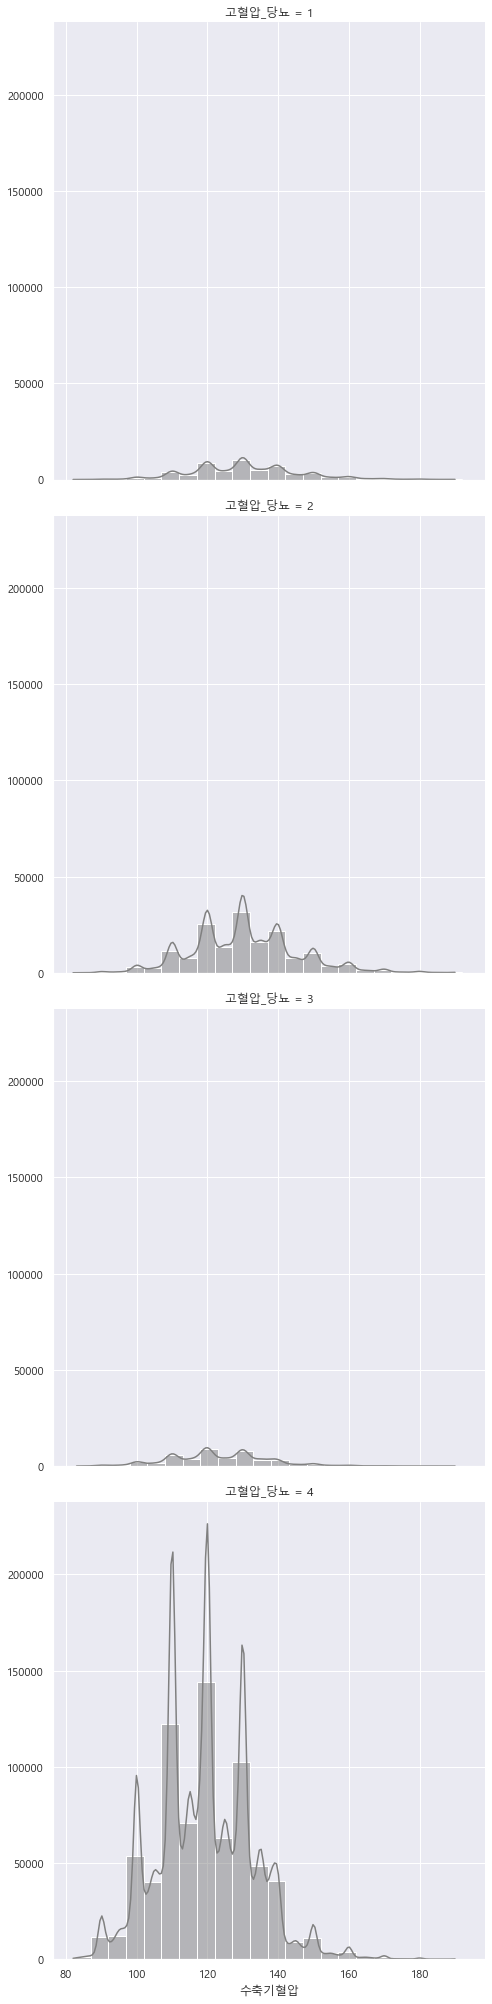

In [57]:
b = sns.FacetGrid(data = df, row = '고혈압_당뇨', height = 7)
b.map(sns.histplot, '수축기혈압', kde = True, binwidth = 5, color = 'gray')

`-` 분포는 모두 대칭이고 종모양으로 보이며 봉우리가 많다

`-` 고혈압_당뇨가 1,2인 경우는 130이 중심으로 보인다

`-` 고혈압_당뇨가 3,4인 경우는 120이 중심으로 보인다

`-` 이를 박스플랏을 통해 자세히 확인하자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='수축기혈압'>

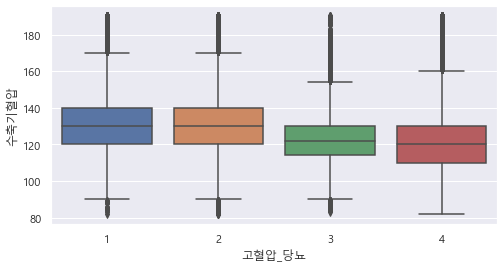

In [55]:
sns.boxplot(x = '고혈압_당뇨', y = '수축기혈압', data = df)

`-` 고혈압/당뇨 둘다 진료내역이 없는 그룹은 수축기혈압이 낮은쪽에서는 이상점이 없다

`-` 바이올린플랏을 그려 분포의 모양도 같이 확인하자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='수축기혈압'>

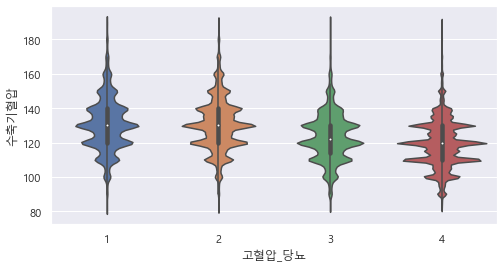

In [56]:
sns.violinplot(x = '고혈압_당뇨', y = '수축기혈압', data = df)

`-` ???? 고혈압_당뇨 진료내역에 따라 분포의 차이가 있긴 하다...

`-` 고혈압/당뇨 진료내역이 없는 사람들의 수축기 혈압은 다른 경우 비해 몇군데에 더욱 많이 몰렸있다

`-` 그런데 봉우리가 많은 분포임을 넷다 동일함 ---> 이유 모름

`-` 데이터를 보면 1은 고혈압 당뇨 둘 다 진료내역이 있고 2는 고혈압만 3은 당뇨만 진료 내역이 있다

`-` 2와 3을 보면 2가 수축기 혈압이 평균적으로 더 높다

`-` 그런데 1과 2를 보면 거의 차이가 없어보인다

`-` 3과 4를 보면 당뇨 진료내역이 있는 사람들이 그렇지 않은 사람보다 평균이 조금 더 크고 분포도 더 넓게 퍼져있다

`-` 고협압/당뇨 둘 다 진료내역이 없는 상황에서 당뇨 진료내역이 추가되면 수축기 혈압이 높아지고 더 넓게 분포한다

`-` 하지만 고혈압 진료내역이 있는 상태라면 당뇨 진료내역의 유무는 수축기 혈압에 거의 영향을 끼치지 못하는 것으로 보인다

`-` 수치로 정확히 확인해보자

In [57]:
pd.Series(df.loc[df['고혈압_당뇨'] == 4, '수축기혈압']).describe() ## 고혈압/당뇨 진료내역 둘 다 없음

count    740662.000000
mean        119.252575
std          13.484496
min          82.000000
25%         110.000000
50%         120.000000
75%         130.000000
max         190.000000
Name: 수축기혈압, dtype: float64

In [58]:
pd.Series(df.loc[df['고혈압_당뇨'] == 3, '수축기혈압']).describe() ## 당뇨 진료내역만 있음

count    43114.000000
mean       123.322146
std         13.618274
min         83.000000
25%        114.000000
50%        122.000000
75%        130.000000
max        190.000000
Name: 수축기혈압, dtype: float64

In [59]:
pd.Series(df.loc[df['고혈압_당뇨'] == 2, '수축기혈압']).describe() ## 고혈압 진료내역만 있음

count    162826.000000
mean        130.551300
std          14.851658
min          82.000000
25%         120.000000
50%         130.000000
75%         140.000000
max         190.000000
Name: 수축기혈압, dtype: float64

In [60]:
pd.Series(df.loc[df['고혈압_당뇨'] == 1, '수축기혈압']).describe() ## 고혈압/당뇨 진료내역 둘 다 있음

count    53398.000000
mean       130.563972
std         14.981472
min         82.000000
25%        120.000000
50%        130.000000
75%        140.000000
max        190.000000
Name: 수축기혈압, dtype: float64

`-` 3과 4의 수축기 혈압 분포는 소름돋을 정도로 똑같다

`-` 1과 2의 경우 당뇨 진료내역이 있는 경우 그렇지 않은 경우보다 수축기 혈압이 평균 4정도 높다

`-` 고혈압이 있는 경우 그렇지 않은 경우보다 수축기 혈압이 평균 10정도 높다

`-` 이완기 혈압도 수축기 혈압과 비슷한 양상을 보일까?

<AxesSubplot:xlabel='이완기혈압', ylabel='Count'>

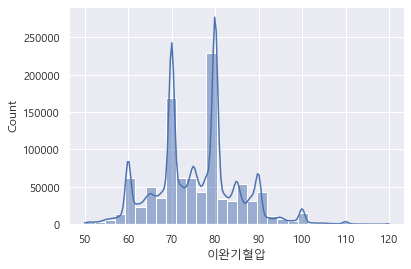

In [61]:
sns.histplot(data = df, x = '이완기혈압', bins = 30, kde = True)

`-` 이완기 혈압도 수축기 혈압의 분포처럼 몇 군에데 데이터가 많이 몰려있는 분포(봉우리)이다

`-` 수축기 혈압 분포와 이완기 혈압 분포를 같이 놓고 비교해보자

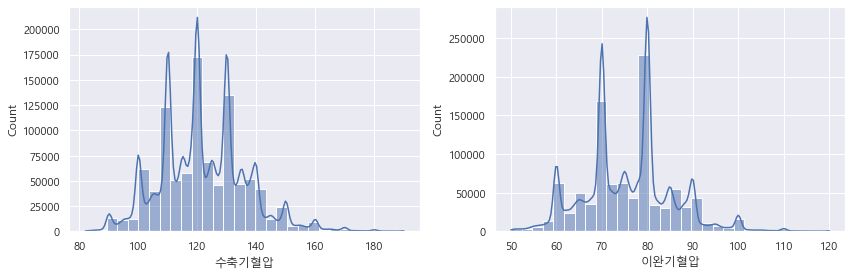

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

sns.histplot(data = df, x = '수축기혈압', bins = 30, kde = True, ax = ax1)
sns.histplot(data = df, x = '이완기혈압', bins = 30, kde = True, ax = ax2)

fig.tight_layout()

`-` 수축기 혈압 분포의 봉우리가 이완기 혈압 분포의 봉우리 개수보다 많다

`-` 수축기 혈압이 이완기 혈압 분포보다 더 넓게 퍼져있다(표준 편차가 더 크다)

`-` 고혈압/당뇨에 따른 이완기 혈압 분포를 확인하자

<AxesSubplot:xlabel='이완기혈압', ylabel='Count'>

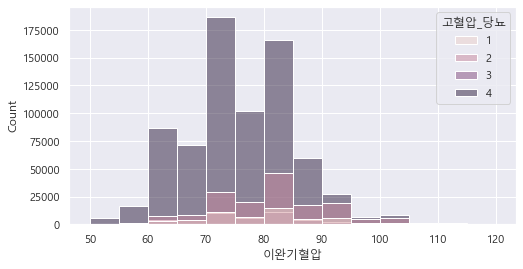

In [28]:
sns.histplot(x = '이완기혈압', binwidth = 5, hue = '고혈압_당뇨', data = df)

`-` 마찬가지로 고혈압/당뇨 둘 다 진료내역이 없는 경우의 표본수가 많아 나머지는 잘 보이지 않는다

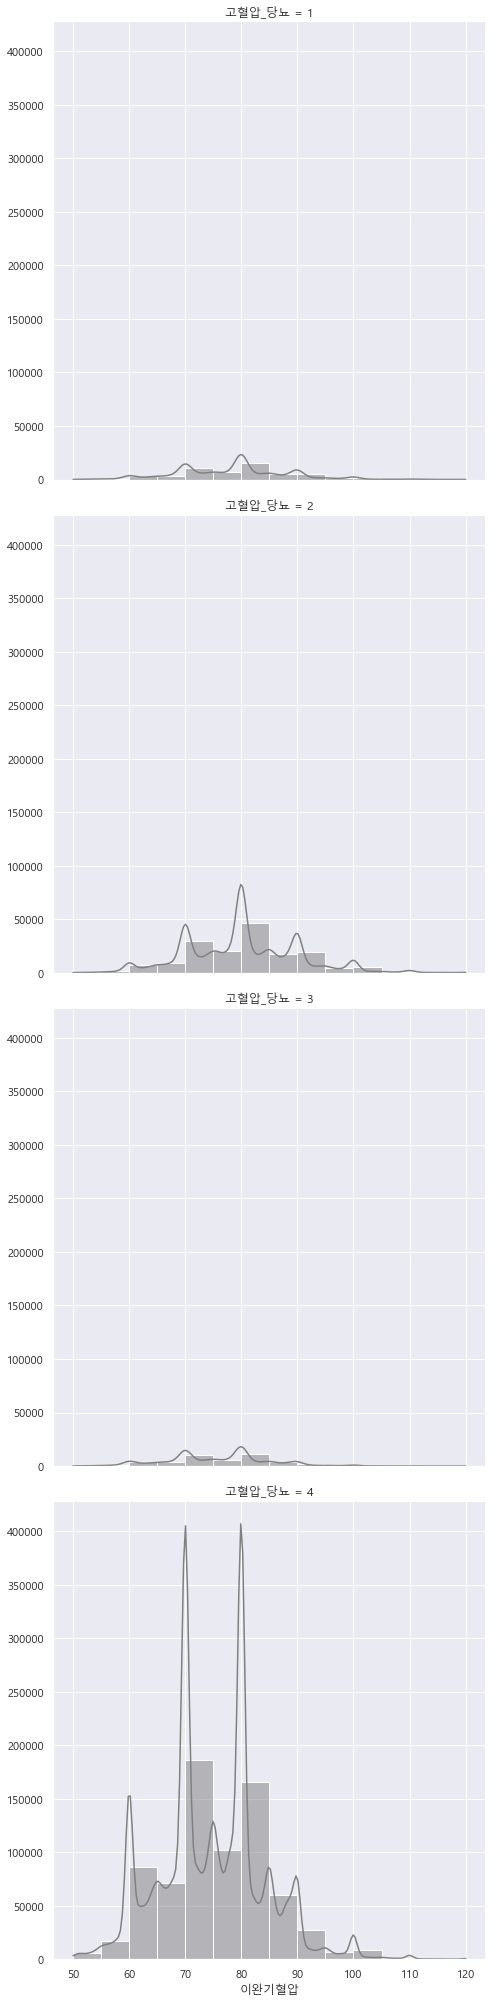

In [60]:
b = sns.FacetGrid(data = df, row = '고혈압_당뇨', height = 7)
b.map(sns.histplot, '이완기혈압', kde = True, binwidth = 5, color = 'gray')

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='이완기혈압'>

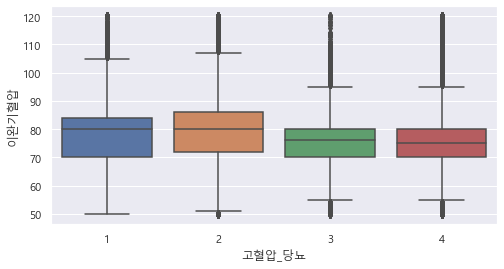

In [58]:
sns.boxplot(x = '고혈압_당뇨', y = '이완기혈압', data = df)

`-` 고혈압/당뇨 둘 다 진료내역이 있는 그룹은 이완기혈압이 낮은쪽에서는 이상점이 없다

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='이완기혈압'>

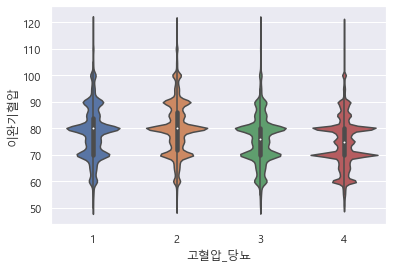

In [65]:
sns.violinplot(x = '고혈압_당뇨', y = '이완기혈압', data = df)

`-` 이완기 혈압도 수축기혈압과 동일한 양상을 보인다

`-` 결과적으로 보면 당뇨 진료내역 여부는 혈압에 영향을 별로 끼치지 못한다

`-` 고혈압은 혈압을 높이도록 영향을 끼친다 ---> 당연한 소리

`-` 여기서 확인하는 고혈압 진료내역의 의미

`-` 현재 고혈압에 앓고있을 수 도 있고 아니면 과거에 고혈압에 걸렸었던 것일 수 도 있다

`-` 즉 현재 고혈압인 경우와 과거에 고혈압이었던 경우로 나뉨 ---> 당뇨도 마찬가지

`-` 공복혈당의 분포를 확인하자

<AxesSubplot:xlabel='공복혈당', ylabel='Count'>

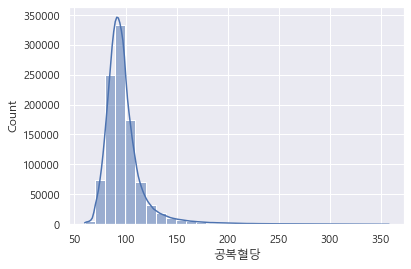

In [70]:
sns.histplot(data = df, x = '공복혈당', bins = 30, kde = True)

`-` 정규분포일 것 같았지만 오른쪽으로 꼬리가 긴 분포이다

`-` 고혈압_당뇨 진료내역에 따른 공복혈당의 분포를 확인하자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='공복혈당'>

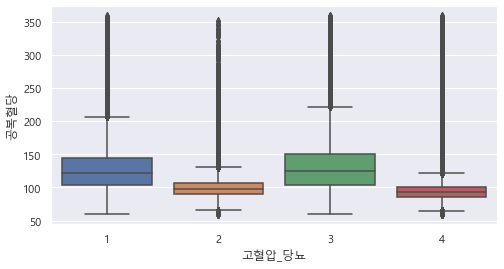

In [61]:
sns.boxplot(x = '고혈압_당뇨', y = '공복혈당', data = df)

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='공복혈당'>

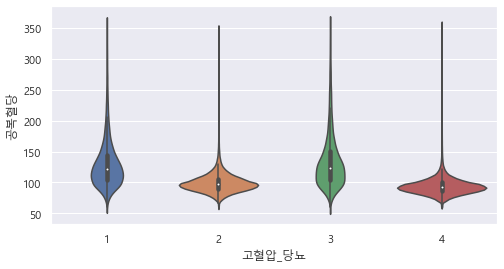

In [62]:
sns.violinplot(x = '고혈압_당뇨', y = '공복혈당', data = df)

`-` 고혈압, 당뇨 둘 다 진료내역이 있는 경우와 당뇨 진료내역이 있는 경우의 분포는 당뇨만 있는 경우가 조금 더 넓게 퍼진것을 빼면 동일하다

`-` 고혈압, 당뇨 둘 다 진료내역이 없는 경우와 고혈압만 있는 경우의 분포는 고혈압만 있는 경우가 조금 더 넓게 퍼진것을 빼면 동일하다

`-` 위의 그림을 통해 공복혈당의 분포는 당뇨병의 진료내역이 좌지우지하는것으로 보인다(고혈압은 거의 영향을 끼치지 못함)

`-` BMI의 분포를 확인하자

<AxesSubplot:xlabel='BMI', ylabel='Count'>

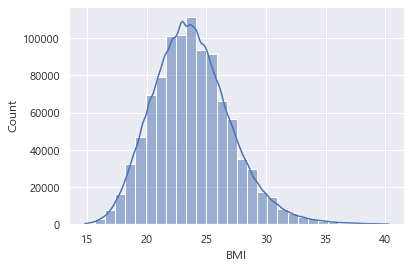

In [71]:
sns.histplot(data = df, x = 'BMI', bins = 30, kde = True)

`-` 정규분포인 것 같지만 오른쪽으로 꼬리가 조금 길다

`-` 고혈압_당뇨 진료내역에 따른 BMI의 분포를 확인하자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='BMI'>

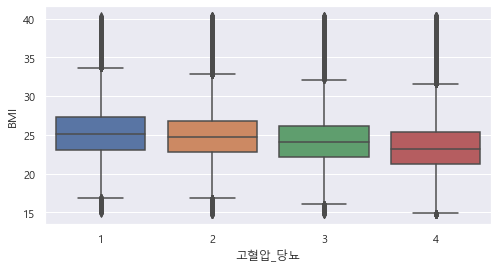

In [64]:
sns.boxplot(x = '고혈압_당뇨', y = 'BMI', data = df)

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='BMI'>

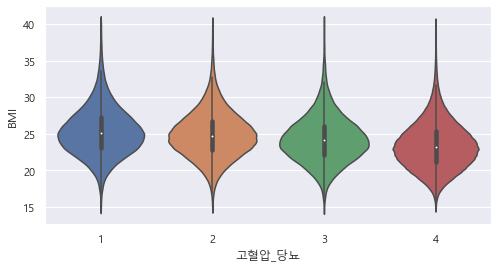

In [65]:
sns.violinplot(x = '고혈압_당뇨', y = 'BMI', data = df)

`-` $4\to 3\to 2\to 1$로 갈수록 BMI가 평균적으로 큰 것 같다 

`-` 수치로 정확히 확인하자

In [66]:
pd.Series(df.loc[df['고혈압_당뇨'] == 4, 'BMI']).describe() ## 고혈압/당뇨 진료내역 둘 다 없음

count    740662.000000
mean         23.423782
std           3.231101
min          14.800000
25%          21.200000
50%          23.200000
75%          25.400000
max          40.300000
Name: BMI, dtype: float64

In [67]:
pd.Series(df.loc[df['고혈압_당뇨'] == 3, 'BMI']).describe() ## 당뇨 진료내역만 있음

count    43114.000000
mean        24.264160
std          3.182547
min         14.800000
25%         22.100000
50%         24.100000
75%         26.100000
max         40.300000
Name: BMI, dtype: float64

In [68]:
pd.Series(df.loc[df['고혈압_당뇨'] == 2, 'BMI']).describe() ## 고혈압 진료내역만 있음

count    162826.000000
mean         24.915340
std           3.208607
min          14.800000
25%          22.800000
50%          24.700000
75%          26.800000
max          40.300000
Name: BMI, dtype: float64

In [69]:
pd.Series(df.loc[df['고혈압_당뇨'] == 1, 'BMI']).describe() ## 고혈압/당뇨 진료내역 둘 다 있음

count    53398.000000
mean        25.318072
std          3.315242
min         14.900000
25%         23.100000
50%         25.100000
75%         27.300000
max         40.300000
Name: BMI, dtype: float64

`-` 수치로 보니 위에서 확인한바와 같이 $4\to 3\to 2\to 1$로 갈수록 BMI가 커진다

`-` 여기까지 개별 양적변수에 대한 분포를 확인했다

`-` 그런데 수축기혈압과 이완기혈압같이 두 변수사이에 관계가 있을 수 있다

`-` 그렇기에 산점도를 그려 변수사이에 관계를 확인해보자

### 두 변수의 시각화

`-` 우선 양적변수간의 상관관계 행렬을 그려보자

In [70]:
corr_df = df.loc[:, ('수축기혈압', '이완기혈압', '공복혈당', 'BMI')]

In [71]:
corr_matrix = corr_df.corr(method = 'pearson') # 상관관계 행렬

In [72]:
corr_matrix

,수축기혈압,이완기혈압,공복혈당,BMI
수축기혈압,1.000000,0.743006,0.186501,0.304383
이완기혈압,0.743006,1.000000,0.138717,0.275492
공복혈당,0.186501,0.138717,1.000000,0.173688
BMI,0.304383,0.275492,0.173688,1.000000


<AxesSubplot:>

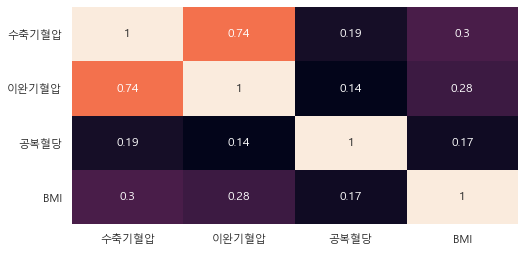

In [73]:
sns.heatmap(corr_matrix, annot = True, cbar = False)

`-` 수축기혈압과 이완기혈압은 상관계수가 0.74로 높고 나머지는 그저 그렇다

`-` 하지만 선형관계가 아닌 다른 관계가 있을수도 있으니 시각화하자

<AxesSubplot:xlabel='수축기혈압', ylabel='이완기혈압'>

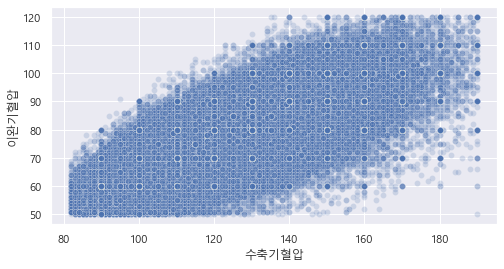

In [135]:
sns.scatterplot(x = '수축기혈압', y = '이완기혈압', alpha = 0.2, data = df) # 'sizes' 는 point의 크기를 조절해주는 매개변수

`-` 심각한 문제가 있는데 관측치(점의 개수)가 너무 많아 시각화가 제대로 되지 않는다

`-` 전체의 1%(10000개) 정도만 무작위 추출하여 산점도를 그려보자

`-` 참고 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [115]:
np.random.seed(2021)
df_s = df.sample(frac = 0.01)

In [116]:
ft = df_s['고혈압_당뇨'].value_counts() 
rft = df_s['고혈압_당뇨'].value_counts() / len(df_s['고혈압_당뇨']) 
DIS_table2 = pd.DataFrame({'Freq': ft, 'Relative freq': rft})
DIS_table2

,Freq,Relative freq
4,7336,0.7336
2,1664,0.1664
1,560,0.0560
3,440,0.0440


`-` 원본과 비율이 거의 동일하다

`-` 새로운 데이터프레임을 사용해 시각화하자

<AxesSubplot:xlabel='수축기혈압', ylabel='이완기혈압'>

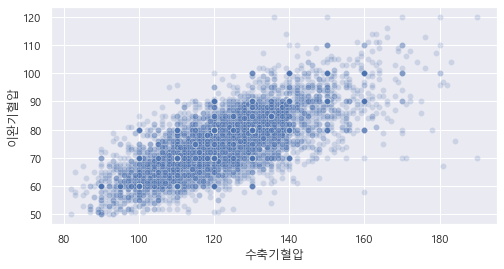

In [133]:
sns.scatterplot(x = '수축기혈압', y = '이완기혈압', alpha = 0.2, data = df_s)  

`-` 사실 시각화의 목적은 고혈압_당뇨 진료내역에 따른 사람들의 특성을 알고싶은 것이었다

`-` 그렇기에 고혈압_당뇨 진료내역을 색깔변수로 하여 산점도를 그려보자

<AxesSubplot:xlabel='수축기혈압', ylabel='이완기혈압'>

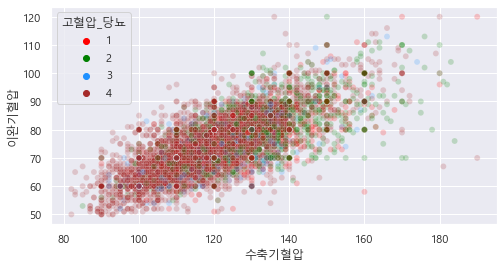

In [163]:
palette = ['red', 'green', 'dodgerblue', 'brown']
sns.scatterplot(x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', palette = palette, alpha = 0.2, data = df_s)  

`-` 고혈압, 당뇨 둘 다 진료내역이 없는 경우가 너무 많아 그림이 제대로 보이지 않는다

`-` 고혈압, 당뇨 둘 다 진료내역이 없는 경우는 따로 그리자

In [181]:
df_s2 = df_s.loc[df_s['고혈압_당뇨'] != 4, :]

In [182]:
df_s3 = df_s.loc[df_s['고혈압_당뇨'] == 4, :]

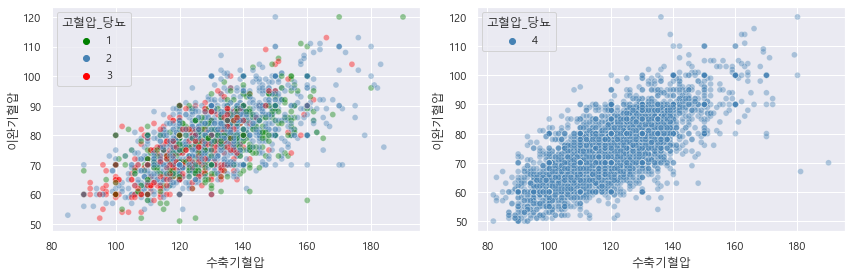

In [209]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', alpha = 0.4, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', alpha = 0.4, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

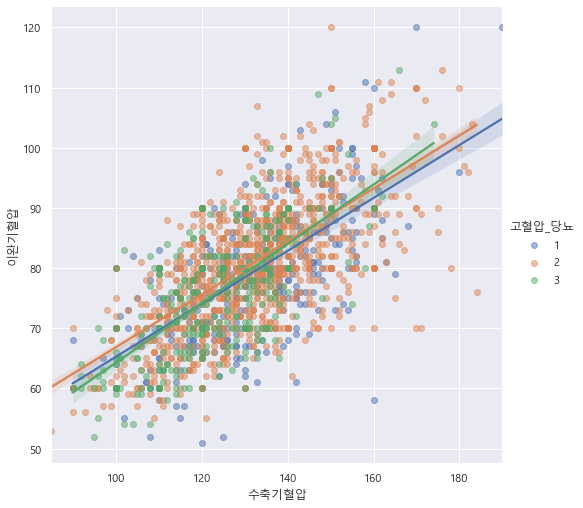

In [214]:
sns.lmplot(x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.5}, height = 7, data = df_s2)

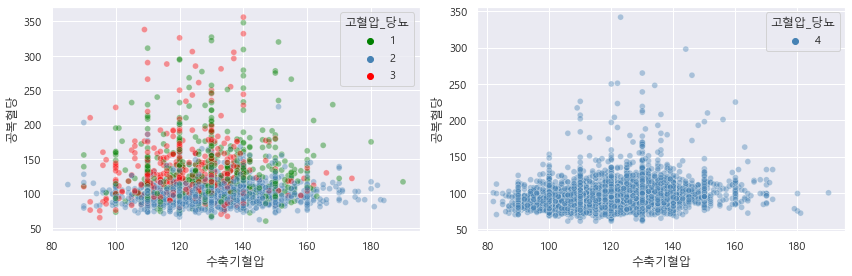

In [208]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '수축기혈압', y = '공복혈당', hue = '고혈압_당뇨', alpha = 0.4, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '수축기혈압', y = '공복혈당', hue = '고혈압_당뇨', alpha = 0.4, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

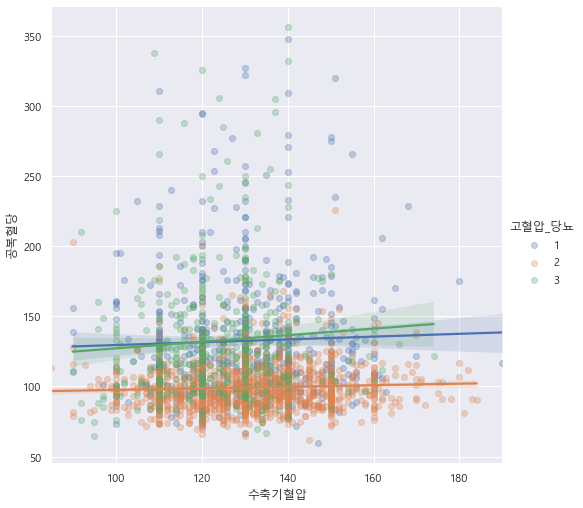

In [211]:
sns.lmplot(x = '수축기혈압', y = '공복혈당', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3}, height = 7, data = df_s2)

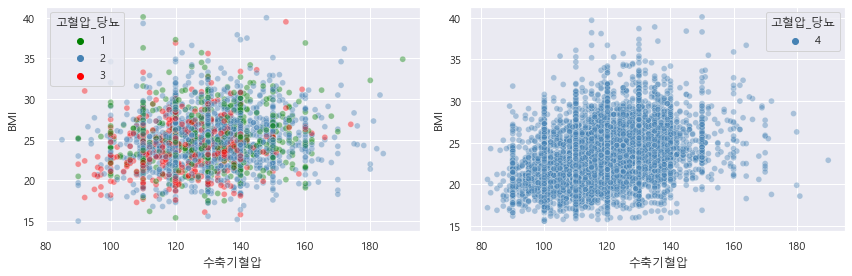

In [220]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '수축기혈압', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.4, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '수축기혈압', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.4, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

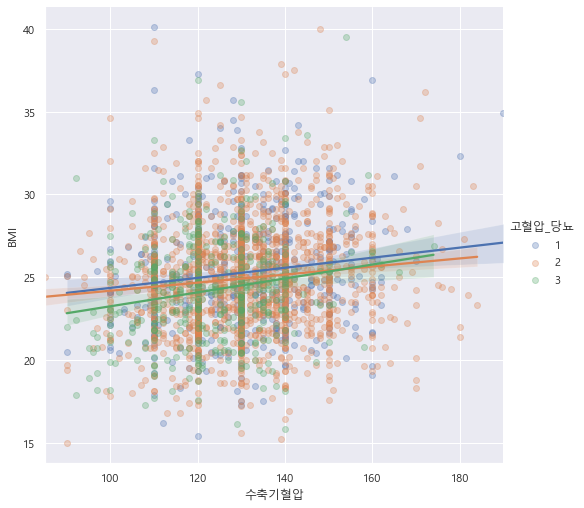

In [219]:
sns.lmplot(x = '수축기혈압', y = 'BMI', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3}, height = 7, data = df_s2)

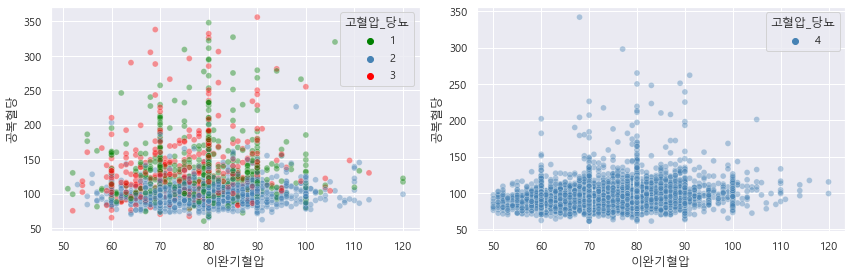

In [221]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '이완기혈압', y = '공복혈당', hue = '고혈압_당뇨', alpha = 0.4, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '이완기혈압', y = '공복혈당', hue = '고혈압_당뇨', alpha = 0.4, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

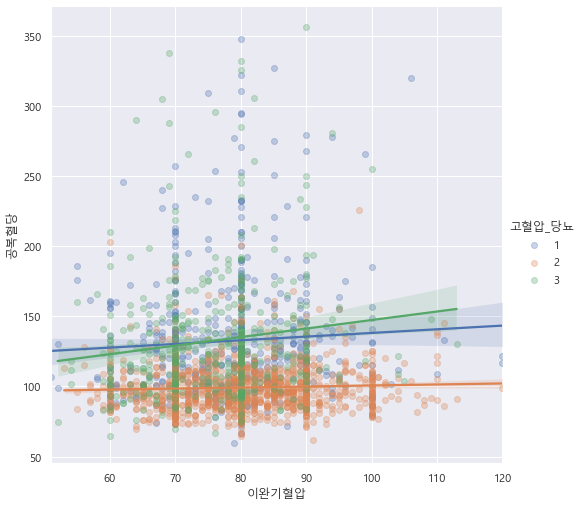

In [222]:
sns.lmplot(x = '이완기혈압', y = '공복혈당', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3}, height = 7, data = df_s2)

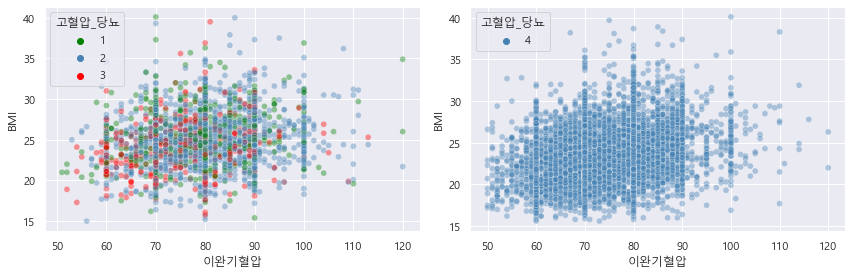

In [223]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '이완기혈압', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.4, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '이완기혈압', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.4, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

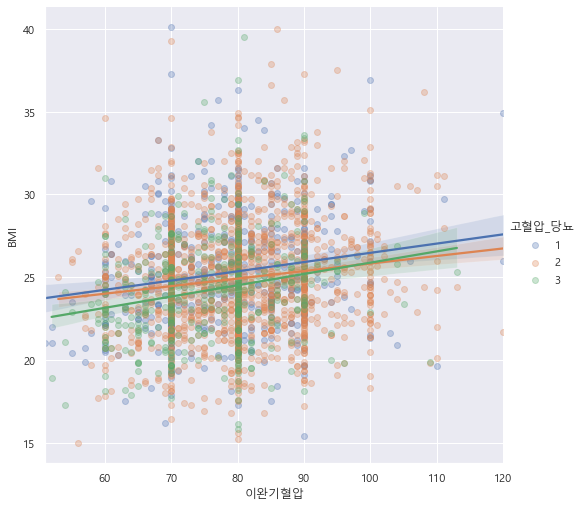

In [225]:
sns.lmplot(x = '이완기혈압', y = 'BMI', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3}, height = 7, data = df_s2)

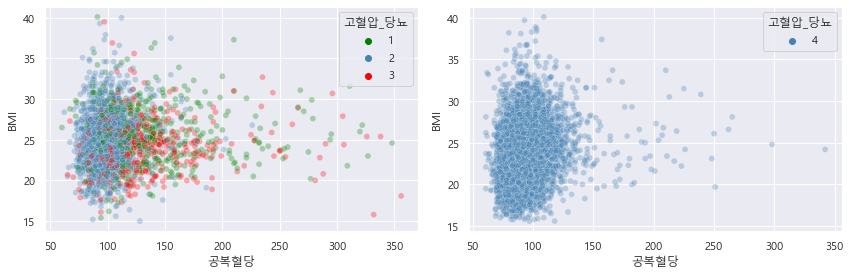

In [227]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '공복혈당', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.3, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '공복혈당', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.3, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

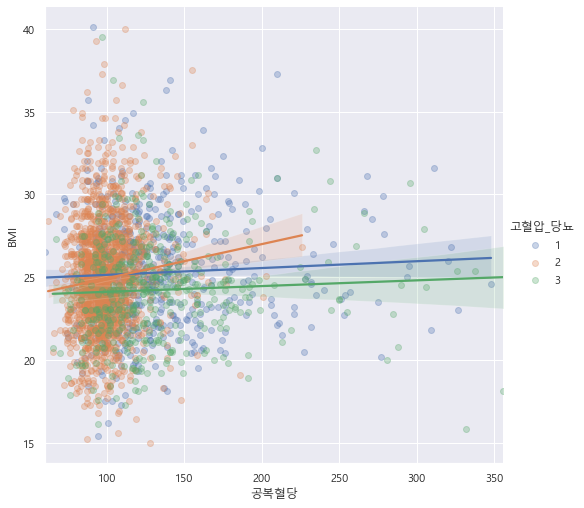

In [224]:
sns.lmplot(x = '공복혈당', y = 'BMI', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3}, height = 7, data = df_s2)

`-` 고혈압/당뇨 범주에 따라 상관계수 행렬을 그려보자

`-` `catplot을 사용하여 고혈압/당뇨에 따른 FacetGrid를 그려보자`

`-` 해볼 시각화 

`-` 혈압 구간으로 cut하여 다른 변수와의 관계 확인

`-` 양적 변수간의 상관관계 확인

`-` 남여별로 차이가 있는지 확인 등등

`-` 연령대별 고혈압/당뇨

`-` 고혈압/당뇨 도수분포표

`-` 커널밀도추정

`-` 무지성 Q-Q plot 멈춰

- 스토리와 흐름, motivation 이 중요함

- 이런 그림을 왜그리고 또 이건 왜했는지

- 왜 이런 시각화나 분석을 하고 다음에는 이러한 시각화나 분석을 했는지 등

`-` 수축기혈압 분포를 그려보니 봉우리가 많았음

`-` 고혈압/당뇨 진료내역에 따라 분포가 달라 그러한 것 같아 이에 따른 boxplot그림

`-` 그런데 각 분포마다 여러개의 봉우리가 있었음

`-` 뭐 때문에 그런걸까?

`-` 여러개 히스토그램의 x축이 동일하면 가로로 그리는 것 보다 세로로 그리는것이 분포비교에 더 좋음